<a href="https://colab.research.google.com/github/tomat8jpg/HW_RiboSEQ/blob/main/RiboSEqp1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:21
🔁 Restarting kernel...


In [1]:
!mkdir /content/files

mkdir: cannot create directory ‘/content/files’: File exists


In [2]:
%cd /content/drive/MyDrive/Riboweq

/content/drive/MyDrive/Riboweq


In [3]:
!cp HSE_RiboSeq_HT.zip cpHSE_RiboSeq_HT.zip

In [4]:
!mv cpHSE_RiboSeq_HT.zip /content/files

In [5]:
%cd /content/files

/content/files


In [6]:
!unzip cpHSE_RiboSeq_HT.zip

Archive:  cpHSE_RiboSeq_HT.zip
   creating: HSE_RiboSeq_HT/
  inflating: __MACOSX/._HSE_RiboSeq_HT  
  inflating: HSE_RiboSeq_HT/02. RiboSeq_EColi_track_r.wig  
  inflating: __MACOSX/HSE_RiboSeq_HT/._02. RiboSeq_EColi_track_r.wig  
  inflating: HSE_RiboSeq_HT/02. RiboSeq_EColi_track_f.wig  
  inflating: __MACOSX/HSE_RiboSeq_HT/._02. RiboSeq_EColi_track_f.wig  
  inflating: HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv  
  inflating: __MACOSX/HSE_RiboSeq_HT/._01. RiboSeq_RNASeq_HCC_counts.tsv  


In [7]:
import numpy as np
import pandas as pd


In [8]:
# Reading dataset
countsraw = pd.read_csv("/content/files/HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
countsraw = countsraw.fillna(0)
countsraw = countsraw[~np.all(countsraw == 0, axis=1)]
countsraw

,geneID,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
0,ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,...,218,457,0,0,200,889,0,0,161,857.0
1,ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.0
2,ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,...,92,170,109,357,60,244,141,173,56,83.0
3,ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,...,127,176,67,176,55,261,64,100,68,176.0
4,ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,...,124,437,7,167,34,201,6,61,9,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,ENSG00000282988.1,RP1-34B20.21,0,0,1,39,0,0,0,5,...,0,31,0,6,0,62,0,0,1,17.0
18941,ENSG00000283013.1,RP11-511P7.5,0,4,27,5,0,32,20,51,...,81,52,1,0,9,42,0,10,3,40.0
18942,ENSG00000283039.1,KLF18,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0.0
18943,ENSG00000283063.1,TRBV6-2,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [9]:
countsraw['sum'] = countsraw.sum(axis = 1)
counts = countsraw[countsraw['sum'] > 100] 
counts

<ipython-input-9-5de397f5849a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  countsraw['sum'] = countsraw.sum(axis = 1)


,geneID,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,...,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum
0,ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,...,457,0,0,200,889,0,0,161,857.0,8498.0
2,ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,...,170,109,357,60,244,141,173,56,83.0,6321.0
3,ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,...,176,67,176,55,261,64,100,68,176.0,4207.0
4,ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,...,437,7,167,34,201,6,61,9,58.0,2548.0
5,ENSG00000000938.12,FGR,0,6,19,9,14,13,61,24,...,13,3,9,42,26,7,10,26,57.0,1095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18932,ENSG00000282651.1,CH17-224D4.2,1,1,0,0,25,0,0,0,...,0,1,0,0,0,12,3,0,0.0,136.0
18937,ENSG00000282883.1,AKR1C3,0,5,0,0,0,1,0,0,...,0,0,13,0,0,0,11,0,0.0,105.0
18938,ENSG00000282936.1,CTC-281F24.5,0,1,1,0,0,6,4,0,...,2,0,0,4,4,0,0,4,4.0,120.0
18940,ENSG00000282988.1,RP1-34B20.21,0,0,1,39,0,0,0,5,...,31,0,6,0,62,0,0,1,17.0,239.0


Для каждого гена найдите коэффициент корреляции числа
каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы
выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не
нормированные на глубину библиотеки каунты, учтите это при анализе.

In [10]:
ribo = counts.loc[:, [col for col in counts.columns if 'RPF' in col]]
rna = counts.loc[:, [col for col in counts.columns if 'RNA' in col]]

In [11]:
ribo.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
3,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
4,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
5,0,6,14,13,15,62,5,5,22,5,0,4,18,6,8,1,3,9,7,10


In [12]:
rna.head()

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
0,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857.0
2,88,187,66,201,80,16,54,165,57,174,61,155,104,114,92,170,60,244,56,83.0
3,60,106,70,156,77,67,78,68,97,128,76,185,114,74,127,176,55,261,68,176.0
4,18,70,4,63,60,4,17,112,28,14,8,118,25,98,124,437,34,201,9,58.0
5,19,9,61,24,106,57,60,9,65,36,16,66,64,32,94,13,42,26,26,57.0


Берем корреляцию Спирмена, т.к. Пирсон работает нормально только на нормированных данных. При подсчете корреляции Спирмена используется не значение параметров, а из взаимное расположение, ранг

In [13]:
import scipy as sc
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
for ribogenes, rnagenes in zip(ribo.iterrows(), rna.iterrows()): 
  print(ribogenes[1][0:])
  break

LC001-normal-RPF    0
LC001-tumor-RPF     0
LC033-normal-RPF    0
LC033-tumor-RPF     0
LC034-normal-RPF    0
LC034-tumor-RPF     0
LC501-normal-RPF    0
LC501-tumor-RPF     0
LC502-normal-RPF    0
LC502-tumor-RPF     0
LC505-normal-RPF    0
LC505-tumor-RPF     0
LC506-normal-RPF    0
LC506-tumor-RPF     0
LC507-normal-RPF    0
LC507-tumor-RPF     0
LC508-normal-RPF    0
LC508-tumor-RPF     0
LC509-normal-RPF    0
LC509-tumor-RPF     0
Name: 0, dtype: int64


In [15]:
corrs = list()
for ribogenes, rnagenes in zip(ribo.iterrows(), rna.iterrows()): 
    corrs.append(sc.stats.spearmanr(ribogenes[1][0:], rnagenes[1][0:])[0])
counts['Spearman'] = corrs
counts.head()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
<ipython-input-15-97f4bb8c1485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['Spearman'] = corrs


,geneID,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,...,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum,Spearman
0,ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,...,0,0,200,889,0,0,161,857.0,8498.0,NaN
2,ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,...,109,357,60,244,141,173,56,83.0,6321.0,0.849624
3,ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,...,67,176,55,261,64,100,68,176.0,4207.0,0.697779
4,ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,...,7,167,34,201,6,61,9,58.0,2548.0,0.811583
5,ENSG00000000938.12,FGR,0,6,19,9,14,13,61,24,...,3,9,42,26,7,10,26,57.0,1095.0,0.518673


Постройте гистограмму распределения этих
коэффициентов корреляции. Для каких генов корреляция самая высокая, а
для каких — самая низкая? Как вы можете это объяснить?

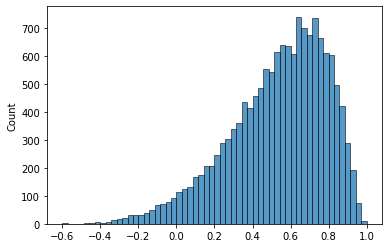

In [16]:
sns.histplot(corrs)

In [17]:
maxcorr_genes = counts.sort_values('Spearman', key=abs, ascending=False)
maxcorr_genes.head(10)

,geneID,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,...,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum,Spearman
5495,ENSG00000124935.3,SCGB1D2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,213.0,1.000000
18124,ENSG00000251258.1,RFPL4B,0,0,0,0,0,0,0,0,...,0,0,0,0,0,35,0,27.0,128.0,1.000000
4534,ENSG00000116690.12,PRG4,4540,1016,1538,252,3185,762,787,162,...,4083,1257,1033,226,4945,4601,1332,1177.0,127829.0,0.990977
12719,ENSG00000171747.8,LGALS4,239,67,95,14,547,1083,230,459,...,248,913,152,740,209,27,118,30.0,26112.0,0.981942
11889,ENSG00000167910.3,CYP7A1,660,19,267,4,98,1412,42,560,...,64,9,21,4,42,89,7,32.0,12114.0,0.980820
18418,ENSG00000261701.6,HPR,1143,255,560,93,893,16021,320,3729,...,1474,306,467,60,1024,699,280,276.0,57249.0,0.980451
9747,ENSG00000156510.12,HKDC1,79,89,54,74,18,377,35,194,...,53,473,42,338,6,36,7,42.0,6202.0,0.980053
12687,ENSG00000171564.11,FGB,82993,9310,25836,3417,96987,61137,22244,17703,...,95762,13820,18355,3992,80912,106955,13711,28405.0,2261998.0,0.975940
9814,ENSG00000157131.10,C8A,6118,276,2683,59,2529,2001,759,737,...,4997,677,2352,300,4188,1023,1489,473.0,97000.0,0.972932
10426,ENSG00000162267.12,ITIH3,8110,4405,4518,1768,10667,13156,4326,5257,...,5912,31749,4110,17169,5409,18212,3124,10604.0,282909.0,0.972932


In [32]:
print(maxcorr_genes['geneSymbol'][0:10].tolist())

['SCGB1D2', 'RFPL4B', 'PRG4', 'LGALS4', 'CYP7A1', 'HPR', 'HKDC1', 'FGB', 'C8A', 'ITIH3']


In [43]:
mincorr_genes = counts.sort_values('Spearman', key=abs, ascending=True)
mincorr_genes.head(10)

,geneID,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,...,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum,Spearman
7912,ENSG00000141391.13,PRELID3A,0,0,3,1,0,3,14,0,...,0,3,1,9,0,2,2,2.0,102.0,0.000000
2204,ENSG00000100242.15,SUN2,730,738,1318,324,970,1790,1419,940,...,411,1112,1518,939,549,778,1253,1427.0,40187.0,0.000000
18247,ENSG00000255837.1,TAS2R20,0,0,1,2,0,0,0,0,...,0,0,11,13,0,0,1,14.0,105.0,0.000000
18121,ENSG00000251192.7,ZNF674,6,19,21,21,13,25,12,21,...,14,27,17,75,7,0,15,27.0,660.0,-0.000382
6466,ENSG00000132600.16,PRMT7,54,95,92,44,35,170,73,71,...,51,120,109,97,47,87,52,137.0,3859.0,0.000752
9422,ENSG00000153443.12,UBALD1,14,50,103,21,37,109,116,95,...,25,3,203,14,17,14,112,65.0,3168.0,0.000754
6318,ENSG00000131503.20,ANKHD1,5,1,20,34,0,14,74,36,...,4,0,44,47,3,3,41,112.0,1225.0,-0.000755
13591,ENSG00000176884.14,GRIN1,0,0,24,17,0,1,30,0,...,0,0,2,1,0,4,0,0.0,261.0,-0.000939
4305,ENSG00000115138.10,POMC,0,0,6,0,0,6,19,1,...,0,0,2,2,0,0,3,2.0,104.0,-0.001002
11425,ENSG00000165996.13,HACD1,2,5,1,4,0,0,2,1,...,0,8,1,9,0,14,3,20.0,189.0,0.001177


In [31]:
print(mincorr_genes['geneSymbol'][0:10].tolist())

['PRELID3A', 'SUN2', 'TAS2R20', 'ZNF674', 'PRMT7', 'UBALD1', 'ANKHD1', 'GRIN1', 'POMC', 'HACD1']


Гены с высокой коррелляцией имеют высокие уровни как транскрипции, так и трансляции  (т.е. нужен белок) - фибриноген, ингибиторы трипсина. Или не транскрибируются (практически не транскнрибируются) и соответственно не транслируются - цинковый палец RFPL4B.  
Гены с низкой коррелляцией имеют более высокий уровень транскрипции, чем трансляции (поэтому могут лучше детектироваться РНК-секом, но не Рибосеком).

Проанализируйте распределение каунтов Ribo-seq:
постройте зависимость дисперсии от среднего. Похоже ли это на
NB-распределение? Если нет, то на какое похоже? Если да, то какие
статистические тесты можно использовать для подтверждения того, что перед
вами NB-распределение?

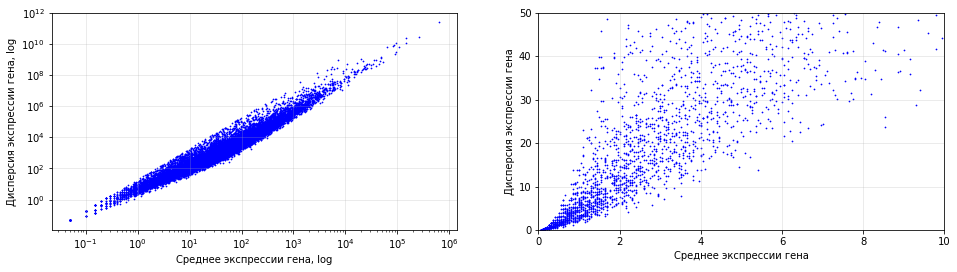

In [33]:
variance = np.var(np.array(ribo), axis = 1)
mean = np.mean(np.array(ribo), axis = 1)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="blue", ax=axes[0])
axes[0].set_xlabel("Среднее экспрессии гена, log")
axes[0].set_ylabel("Дисперсия экспрессии гена, log")
axes[0].set_xscale("log"); axes[0].set_yscale("log")
axes[0].grid(alpha=0.3)

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="blue", ax=axes[1])
axes[1].set_xlabel("Среднее экспрессии гена")
axes[1].set_ylabel("Дисперсия экспрессии гена")
axes[1].set_xlim(0, 10); axes[1].set_ylim(0, 50)
axes[1].grid(alpha=0.3)

Это похоже на NB распределение, т.к. наблюдается овердисперсия (диспресия распределения каунтов больше среднего). Для проверки схожести эмпирического и теоретического распределений используют тест Колмогорова-Смирнова, посмотреть схожесть кумулятивных функций распределений, U-критерий Манна — Уитни

Подготовка данных для R 

In [34]:
countss = counts.set_index('geneID')
countss

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA,sum,Spearman
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,0,...,0,0,200,889,0,0,161,857.0,8498.0,NaN
ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,325,...,109,357,60,244,141,173,56,83.0,6321.0,0.849624
ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,130,...,67,176,55,261,64,100,68,176.0,4207.0,0.697779
ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,44,...,7,167,34,201,6,61,9,58.0,2548.0,0.811583
ENSG00000000938.12,FGR,0,6,19,9,14,13,61,24,15,...,3,9,42,26,7,10,26,57.0,1095.0,0.518673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000282651.1,CH17-224D4.2,1,1,0,0,25,0,0,0,5,...,1,0,0,0,12,3,0,0.0,136.0,NaN
ENSG00000282883.1,AKR1C3,0,5,0,0,0,1,0,0,0,...,0,13,0,0,0,11,0,0.0,105.0,NaN
ENSG00000282936.1,CTC-281F24.5,0,1,1,0,0,6,4,0,0,...,0,0,4,4,0,0,4,4.0,120.0,-0.258195


In [35]:
ribo_r = countss.loc[:, [col for col in counts.columns if 'RPF' in col]]
rna_r = countss.loc[:, [col for col in counts.columns if 'RNA' in col]]
ribo_r.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419.12,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
ENSG00000000457.13,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
ENSG00000000460.16,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61
ENSG00000000938.12,0,6,14,13,15,62,5,5,22,5,0,4,18,6,8,1,3,9,7,10


In [36]:
ribo_r.to_csv('./ribo_r.tsv', sep='\t')
rna_r.to_csv('./rna_r.tsv', sep='\t')

In [37]:
['normal' if col.find('normal')>-1 else 'tumor' for col in ribo_r.columns[0:]]

['normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor',
 'normal',
 'tumor']

In [38]:
ribo_design = pd.DataFrame()
ribo_design['condition'] = ['normal' if col.find('normal')>-1 else 'tumor' for col in ribo_r.columns[:]]
ribo_design['experiment'] = ['RPF' if col.find('normal')>-1 else 'RPF' for col in ribo_r.columns[:]]
ribo_design['colour'] = ['blue' if col.find('normal')>-1 else 'red' for col in ribo_r.columns[:]]
ribo_design.index = ribo_r.columns
ribo_design

,condition,experiment,colour
LC001-normal-RPF,normal,RPF,blue
LC001-tumor-RPF,tumor,RPF,red
LC033-normal-RPF,normal,RPF,blue
LC033-tumor-RPF,tumor,RPF,red
LC034-normal-RPF,normal,RPF,blue
LC034-tumor-RPF,tumor,RPF,red
LC501-normal-RPF,normal,RPF,blue
LC501-tumor-RPF,tumor,RPF,red
LC502-normal-RPF,normal,RPF,blue
LC502-tumor-RPF,tumor,RPF,red


In [39]:
rna_design = pd.DataFrame()
rna_design['condition'] = ['normal' if col.find('normal')>-1 else 'tumor' for col in rna_r.columns[:]]
rna_design['experiment'] = ['RNA' if col.find('normal')>-1 else 'RNA' for col in ribo_r.columns[:]]
rna_design['colour'] = ['blue' if col.find('normal')>-1 else 'red' for col in rna_r.columns[:]]
rna_design.index = rna_r.columns[:]


In [40]:
rna_design

,condition,experiment,colour
LC001-normal-RNA,normal,RNA,blue
LC001-tumor-RNA,tumor,RNA,red
LC033-normal-RNA,normal,RNA,blue
LC033-tumor-RNA,tumor,RNA,red
LC034-normal-RNA,normal,RNA,blue
LC034-tumor-RNA,tumor,RNA,red
LC501-normal-RNA,normal,RNA,blue
LC501-tumor-RNA,tumor,RNA,red
LC502-normal-RNA,normal,RNA,blue
LC502-tumor-RNA,tumor,RNA,red


In [41]:
ribo_design.to_csv('./ribo_design.tsv', sep='\t', index = True, header = True)
rna_design.to_csv('./rna_design.tsv', sep='\t', index = True, header = True)

In [46]:
countss.head
countss.drop('geneSymbol', axis=1, inplace=True)

In [47]:
countss.drop('sum', axis=1, inplace=True)
countss.drop('Spearman', axis=1, inplace=True)
countss.head

<bound method NDFrame.head of                     LC001-normal-RPF  LC001-tumor-RPF  LC001-normal-RNA  \
geneID                                                                    
ENSG00000000003.14                 0                0               402   
ENSG00000000419.12               168              239                88   
ENSG00000000457.13                65              121                60   
ENSG00000000460.16                 8               43                18   
ENSG00000000938.12                 0                6                19   
...                              ...              ...               ...   
ENSG00000282651.1                  1                1                 0   
ENSG00000282883.1                  0                5                 0   
ENSG00000282936.1                  0                1                 1   
ENSG00000282988.1                  0                0                 1   
ENSG00000283013.1                  0                4                2

In [48]:
countss.to_csv('./counts.tsv', sep='\t', index = True, header = True)

In [52]:
# Design matrix
design = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in countss.columns],
    "experiment": [sample_name.split("-")[2] for sample_name in countss.columns],
}, index=countss.columns)

design.head()

,condition,experiment
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF
LC001-normal-RNA,normal,RNA
LC001-tumor-RNA,tumor,RNA
LC033-normal-RPF,normal,RPF


In [53]:
design.to_csv('./design.tsv', sep='\t', index = True, header = True)